In [11]:
import torch
from PIL import Image
from torchvision import datasets,models,transforms
import numpy as np

In [12]:
model = torch.load("model.pt")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
data_transforms = {
   "asl_alphabet_train (Copy 2)":transforms.Compose([
       transforms.RandomResizedCrop(224),
       transforms.RandomHorizontalFlip(),
       transforms.ToTensor(),
       transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
   ]),
    "asl_alphabet_train (Copy)":transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])  
}

In [14]:
import matplotlib.pyplot as plt
class_names = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t',' ','u','v','w','x','y','z']

new_image_path = "b1.jpg"
new_image = Image.open(new_image_path)
transform = data_transforms["asl_alphabet_train (Copy)"]

input_tensor = transform(new_image).unsqueeze(0)

In [15]:
with torch.no_grad():
    model_output = model(input_tensor)
    _,predicted = torch.max(model_output,1)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [16]:
predicted_ = class_names[predicted.item()]
predicted_

NameError: name 'predicted' is not defined

NameError: name 'predicted_' is not defined

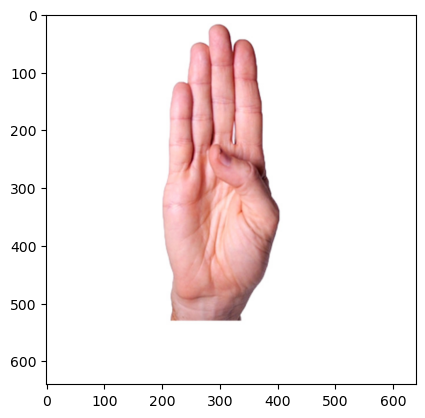

In [17]:
plt.imshow(np.array(new_image))
plt.title(predicted_)

In [8]:
import matplotlib.image as mpimg